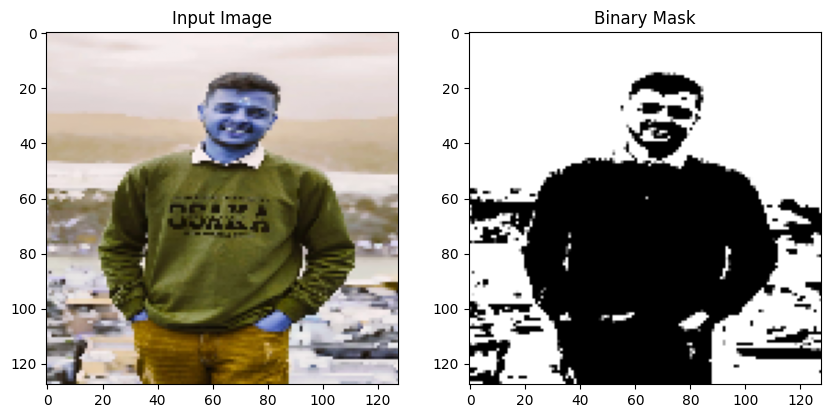

In [20]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load an image (Replace with your image path)
image = cv2.imread("ribhu.jpg")  
image = cv2.resize(image, (128, 128))  #
image = image / 255.0  # Normalize


mask = cv2.imread("mask.png", cv2.IMREAD_GRAYSCALE)  
mask = cv2.resize(mask, (128, 128))
mask = np.expand_dims(mask, axis=-1)  
mask = mask / 255.0  # Normalize to 0-1

# Convert to arrays
train_images = np.array([image], dtype=np.float32)
train_masks = np.array([mask], dtype=np.float32)

# Display Image and Mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title("Binary Mask")
plt.imshow(mask, cmap='gray')

plt.show()


In [21]:
def unet_model(input_size=(128, 128, 3)):
    inputs = layers.Input(input_size)

    # with the help of encoder path extract the important feature like CNN
    c1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    c2 = layers.MaxPooling2D((2, 2))(c2)

    # bottleneck play a bridge role between encoder and decorder
    c3 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)

    # Decoder refine the image produced the segmented mask
    u4 = layers.UpSampling2D((2, 2))(c3)  #upscale to the large dimesnional
    c4 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u4)

    u5 = layers.UpSampling2D((2, 2))(c4)   #one filter output for segmentation mask
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(u5)

    model = keras.Model(inputs, outputs)
    return model

# Build and compile the model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 128, 128, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 1)         │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,081 (164.38 KB)

 Trainable params: 42,081 (164.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train for a few epochs
model.fit(train_images, train_masks, epochs=10, batch_size=1)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6250 - loss: 0.6900
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.5604 - loss: 0.6685
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.5617 - loss: 0.6504
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.5632 - loss: 0.6308
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.5672 - loss: 0.6105
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5714 - loss: 0.5886
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.5829 - loss: 0.5673
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6172 - loss: 0.5432
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.7174 - loss: 0.5157
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8233 - loss: 0.4843


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step


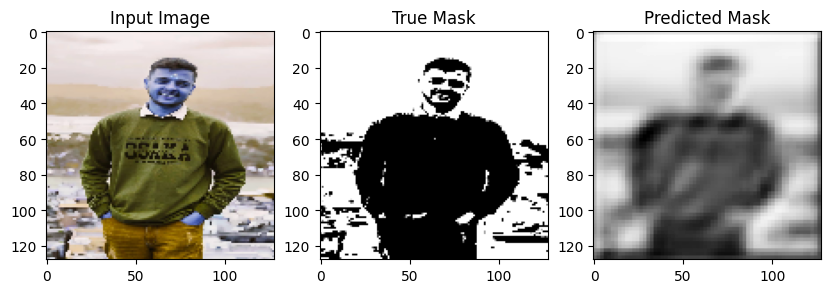

In [23]:
# Predict the mask
predicted_mask = model.predict(np.expand_dims(train_images[0], axis=0))[0]

# Show results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(train_images[0])

plt.subplot(1, 3, 2)
plt.title("True Mask")
plt.imshow(train_masks[0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap='gray')

plt.show()
